In [1]:
%matplotlib inline

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [3]:
def get_permutation_table(seed=None):
    np.random.seed(seed)
    p = np.arange(0, 256, 1)
    np.random.shuffle(p)
    
    return np.concatenate((p, p))

def get_constant_vector(p):
    h = p & 3
    if h == 0:
        return np.array([1.0, 1.0])
    elif h == 1:
        return np.array([-1.0, 1.0])
    elif h == 2:
        return np.array([-1.0, -1.0])
    else:
        return np.array([1.0, -1.0])

def fade(t):
    return ( ( 6 * t - 15 ) * t + 10 ) * t * t * t

def lerp(a1, a2, t):
    return a1 + t * ( a2 - a1 )

def perlin2d(x, y, P_TABLE):
    X = math.floor(x) & 255
    xf = x - math.floor(x)
    
    Y = math.floor(y) & 255
    yf = y - math.floor(y)
    
    topRight = np.array([xf - 1.0, yf - 1.0])
    topLeft = np.array([xf, yf - 1.0])
    bottomRight = np.array([xf - 1.0, yf])
    bottomLeft = np.array([xf, yf])
    
    valueTopRight = P_TABLE[ P_TABLE [ X + 1 ] + Y + 1 ]
    valueTopLeft = P_TABLE[ P_TABLE [ X ] + Y + 1 ]
    valueBottomRight = P_TABLE[ P_TABLE [ X + 1 ] + Y ]
    valueBottomLeft = P_TABLE[ P_TABLE [ X ] + Y ]
    
    dotTopRight = topRight.dot(get_constant_vector(valueTopRight))
    dotTopLeft = topLeft.dot(get_constant_vector(valueTopLeft))
    dotBottomRight = bottomRight.dot(get_constant_vector(valueBottomRight))
    dotBottomLeft = bottomLeft.dot(get_constant_vector(valueBottomLeft))
    
    u = fade(xf)
    v = fade(yf)
    
    return lerp(
            lerp(dotBottomLeft, dotTopLeft, v),
            lerp(dotBottomRight, dotTopRight, v), u)


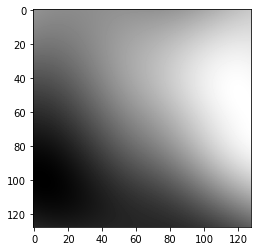

In [4]:

from perlin_noise import PerlinNoise

P_TABLE = get_permutation_table()

GRID_SIZE = 128

noise = np.zeros((GRID_SIZE, GRID_SIZE))

for x in range(GRID_SIZE):
    for y in range(GRID_SIZE):
            nx = x / GRID_SIZE - 0.5
            ny = y / GRID_SIZE - 0.5
            
            noise[x][y] = 1 + perlin2d(nx, ny, P_TABLE) * 0.5

plt.imshow(noise, cmap="gray")
plt.show()


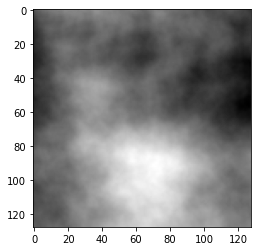

In [12]:
P_TABLE = get_permutation_table()

GRID_SIZE = 128

noise = np.zeros((GRID_SIZE, GRID_SIZE))

for x in range(GRID_SIZE):
    for y in range(GRID_SIZE):
        
        freq = 0.005
        ampl = 1
        octaves = 8
        pers = 0.5
        
        for o in range(octaves):
            noise[x][y] += ampl * perlin2d(x * freq, y * freq, P_TABLE)
            ampl *= pers
            freq *= 2
        
plt.imshow(noise, cmap="gray")
plt.show()